* We have to first understand the problem. meaning and importance
* Understand target variable  (univariable study)
* Understand how the dependent and independent variable relates
* Clean the data, handling missing data, outliers and categorical variables 
* Testing our assumptions


In [1]:
#import libaries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
#default settings for maplotlib
%matplotlib inline 

In [2]:
df_train = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')

In [3]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# Understanding the data... 
analyze the variables meaning and relevance to our problem
we can create and excel spreadsheet 

* Variable name
* Type (numerical or categorical)
* Segment (There are three 3 possible categories we can seperate our problem to. Building,Space and Location. Building = Overall Quality, Space = size ( area, basementsize etc), location = Neigbourhood
* Expectation Our expectation about how variables will influence SalePrice (target value), categorized as high,medium and low 
* Conclusion conclusion about importance of var. We use the same categorical var as scale in expectation
* Comments What we thought along the way 

Type and Segment maybe be needed for future reference, Expectation column is important. We have to read the description of variables to understand its importance 

* Would we care about the var when buying a house?
* If so how important would this variable be?
* How relevant is this var ( var with very high correlation with each other)

After this excercise we filter spread sheet to data with 'High' 'Expectation'

Input these features to scatterplot and sale price, this will help us determining conclusion

Important variables may be:

* (Overall Qual), kinda sus variable as we dont know how it is actually calculated
* YearBuilt
* TotalBsmntSF
* GRLivArea

This only includes building and space category... excludes location which is extremely important too. Categorical Var such as location is not good to vizualize with scatter plot, box plot would do better.

Vizualization affects conclusion...







# Analyzing House Prices 

In [4]:
df_train['SalePrice'].describe()


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

As non of our values are 0, we are good!

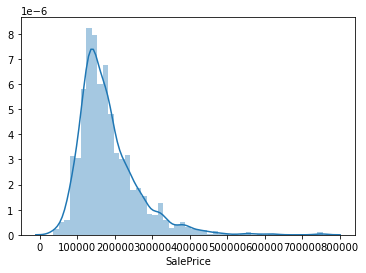

In [5]:
#lets plot a distribution
sns.distplot(df_train['SalePrice']);

* Deviate from normal distribution
* Have Positive skewness
* Has peak 

In [6]:
#skewness and kurtosis
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


# Analyzing correlations between Target and other variables 

Start with numerical values first 

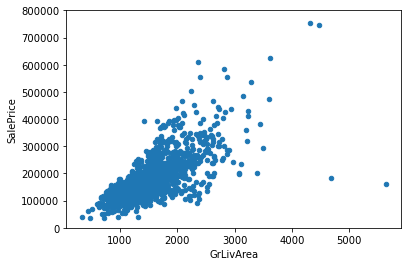

In [7]:
#scatter plot grlivarea/saleprice
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var,y='SalePrice', ylim=(0,800000));

There seems to be a linear relationship..

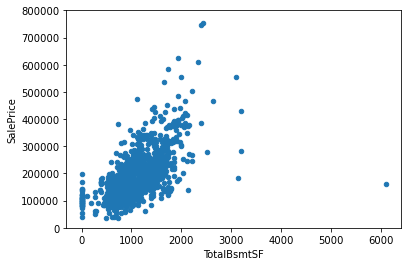

In [8]:
#scatter plot for totalbsmntsf/saleprice
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

There is a very strong/exponential linear relationship. Sometimes it does not affect sale price

Relationship with Categorical Variables 



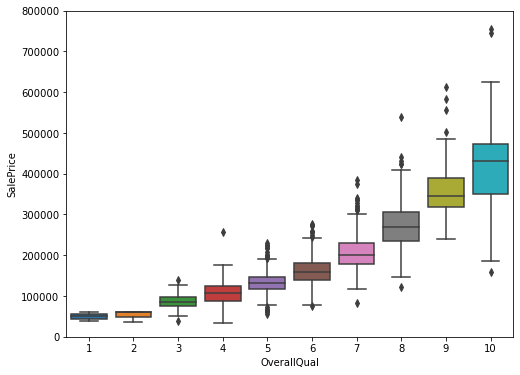

In [9]:
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=var, y='SalePrice', data=data)
fig.axis(ymin=0, ymax=800000);


Positive linear relationships between overall quality and SalePrice 

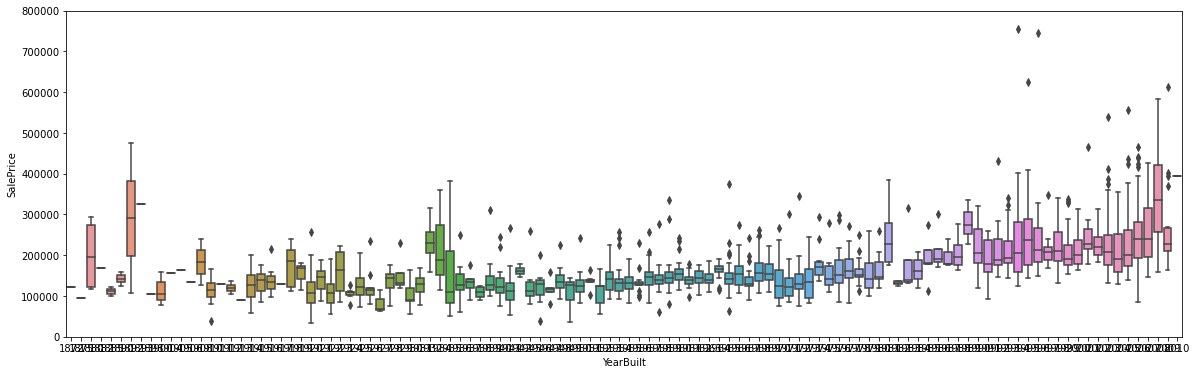

In [10]:
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(20,6))
fig = sns.boxplot(x=var, y='SalePrice', data=data)
fig.axis(ymin=0, ymax=800000);

There seems to be some postive effect but much more variable. We also do not know whether or not sale price is adjusted by inflation which is an important factor... there might also be dips during recessions also in 2008 there was the housing bubble which is why we might see a dip after..we can may be analyze year sold too 

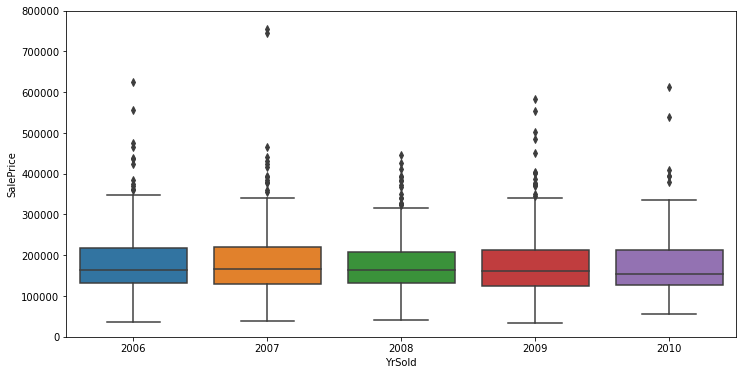

In [11]:
var ='YrSold'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(12,6))
fig = sns.boxplot(x=var, y='SalePrice', data=data)
fig.axis(ymin=0, ymax=800000);

seems there is no correlation ... 

**Conclusion for now**

Numerical: GrLiveArea and TotalBsmntSF seem to be linearly related with 'SalePrice'.

OverallQual and YearBuilt also have pos correlation but less so for yearbuilt ... 



# A more objective analysis 

All features analyzed prior to this was based on our SUBJECTIVE view of what may be important, we can use other methods to find postive correlations between out features.


Building a correlation matrix using a Heatmap

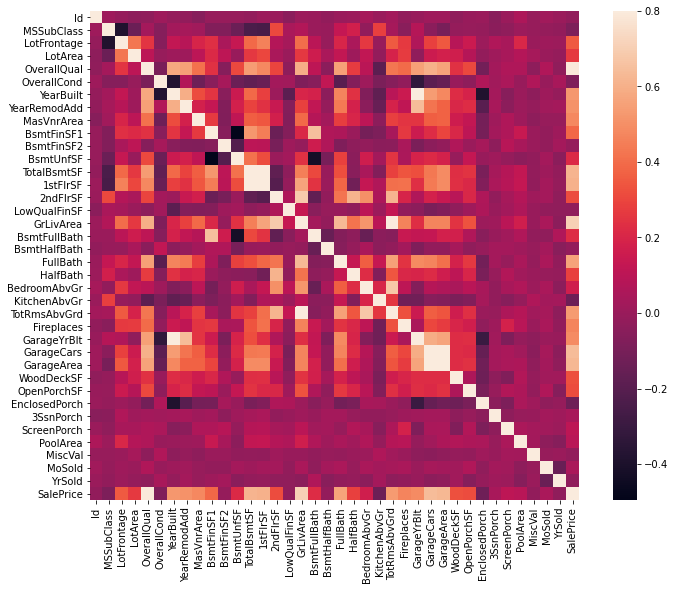

In [12]:
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat,vmax=.8, square=True);

Heat maps allows us to analyze multicollinearity, which can be elimanated.

Our target value, sale price can be seen correlated to the vars we listed above and other variables that we did not include. We can include them later in feature selection

Zoomed correlation matrix Heatmap

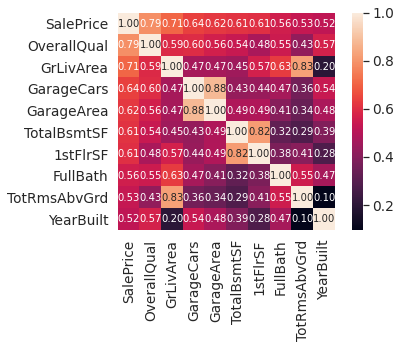

In [13]:
k = 10 # this is number of vars we will include in heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Variables we thougt were highly correlated were... (OverallQual,GrliveArea,Bsmnt size)

There are some with high correlation such as GarageCars and Garage Area.. Garage cars have higher correlation so we keep that and discard the other

Totalbsmnt and 1stFlrsf also highly correlated with each other 

TotsRmsAbvGrd and GrLive Area also ..



Massive scatterplots for target and correlated variables

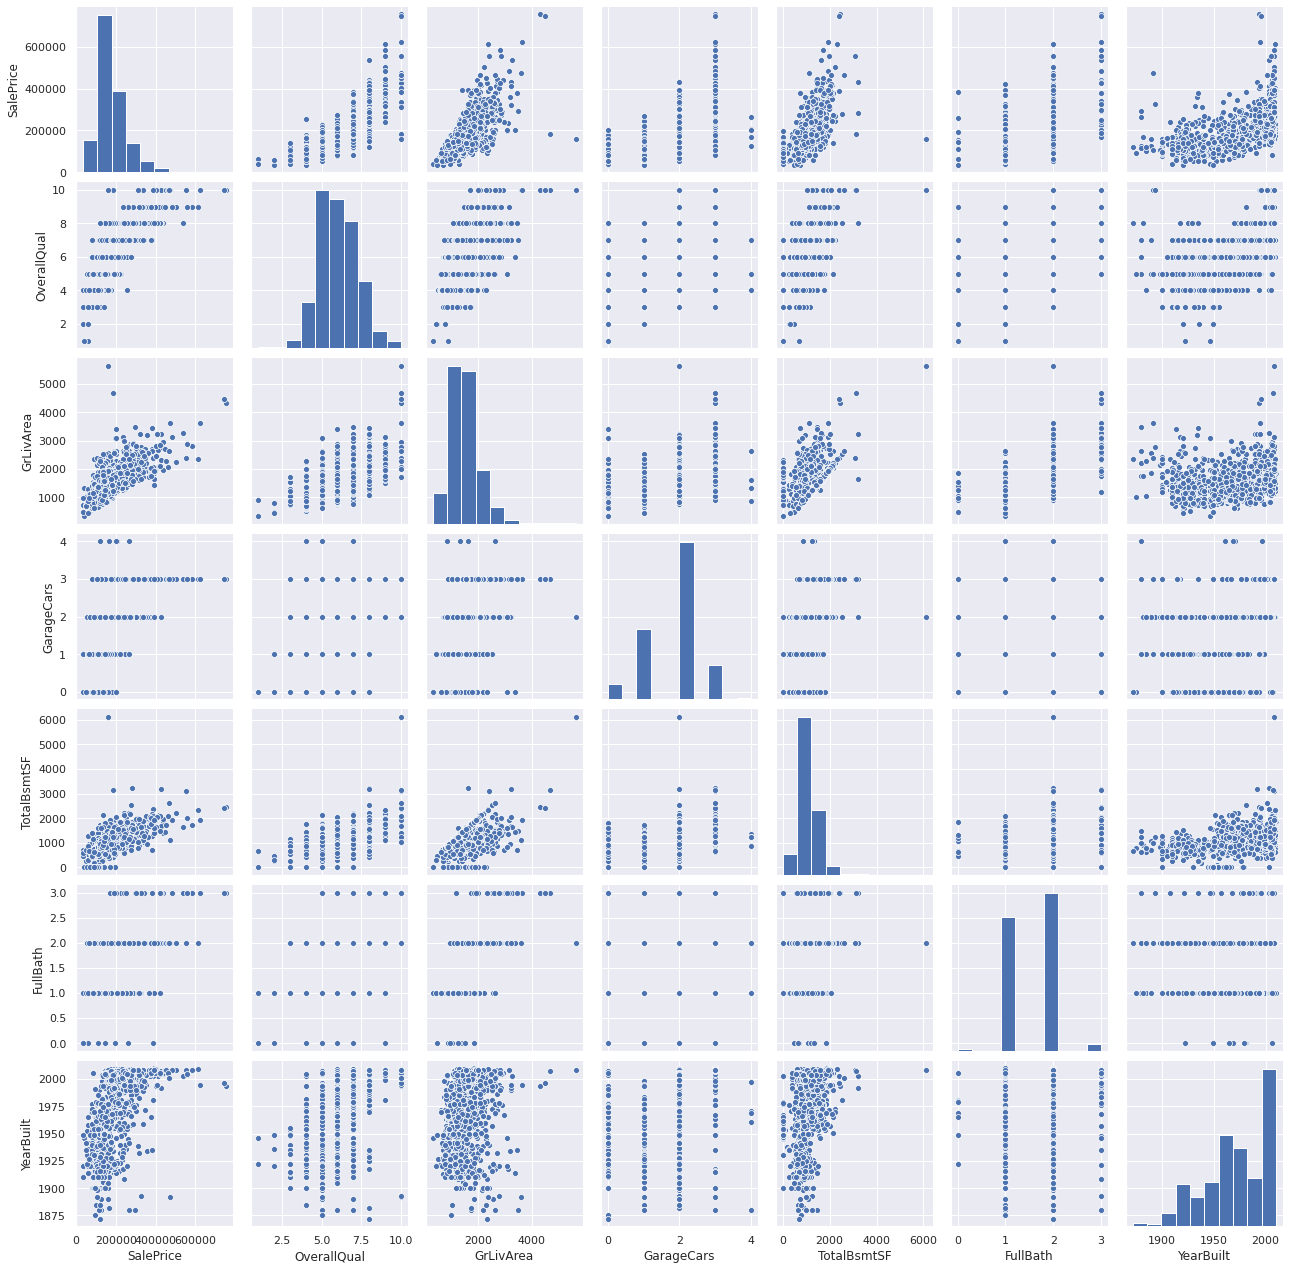

In [14]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();



# Dealing with missing data

2 questions to ask before we clean

How common is missing data

Are the missing data random or does it have pattern 

In [15]:
#missing data 
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total','Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


Look at variables we will miss after we remove them...
those above 15% we remove
most of the data above seem either highly correlated with data that is not missing, electrical only has 1 input so we remove that too

In [16]:
#removing all the missing data

df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index,1)
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
df_train.isnull().sum().max()

0

# Outliers

We should prevent outliers from affecting our models. 

Univariate analysis

We need to establish a threshold to define what is an outlier. We must standaridize the data. We need to make our data values have a mean of 0 and standard deviation of 1 



In [17]:
saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)


outer range (low) of the distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

outer range (high) of the distribution:
[[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


low range are vals near 0
high range are vals far from 0 such as 7
they are potential outliers 


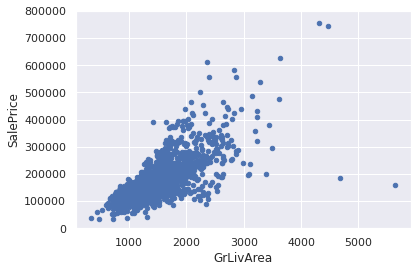

In [18]:
#bivariate analysis saleprice/grlivarea
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));


There seems to be 2 outliers within the GrLiveArea 

In [19]:
#deleting specific points
df_train.sort_values(by = 'GrLivArea', ascending = False)[:2]
df_train = df_train.drop(df_train[df_train['Id'] == 1299].index)
df_train = df_train.drop(df_train[df_train['Id'] == 524].index)

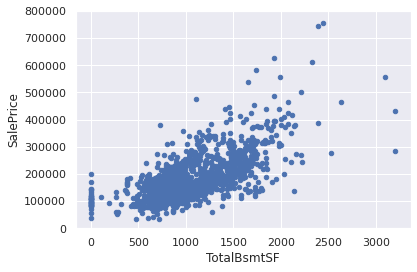

In [20]:
#bivariate analysis saleprice/grlivarea
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

# Applying multivariate techiniques 


Normalility - Data should look like a normal distribution. Several statistics test such as T test needs this. We will check univariate normality for 'Sale Price. Univariate normality does not ensiure multivariate normality. In big samples >2-- normaility is not a problem but avoids problems such as hoteroscedasicty 

Homoscedacity - assumption that dependent variables exhibit equal levels of variance accross range of predictor variables. homscedacity is needed as we want the error term to be the same across all independent variables. 

Linearity - We can use scatter plots to search for linear transformations. If patters are not linear, we can explore data transformations. 

Absence of correlated errors _ happens when one error is correlated to another. One pos error makes a negative error sytematically = relationship between variables. Usually occurs in time series. we should add a var to explain the effect we get. 





Plotting the variables 

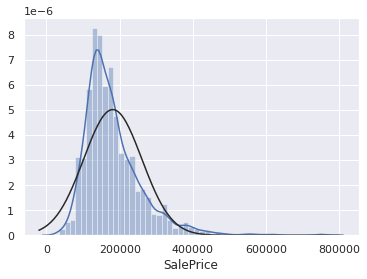

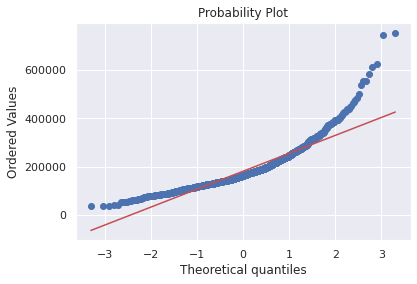

In [21]:
sns.distplot(df_train['SalePrice'], fit=norm );
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)


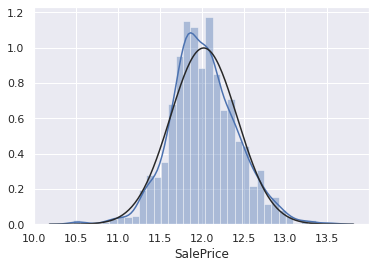

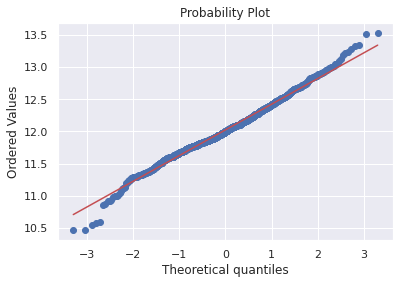

In [22]:
# apply a log transformation

df_train['SalePrice'] = np.log(df_train['SalePrice'])

#transformed histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

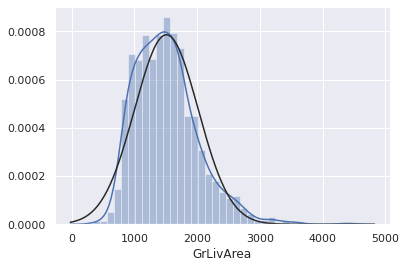

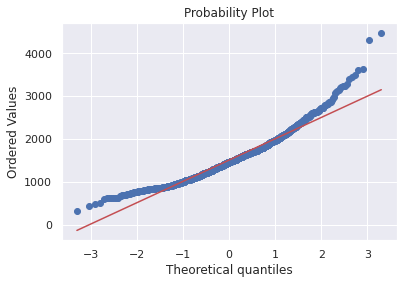

In [23]:
#transformed histogram and normal probability plot
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

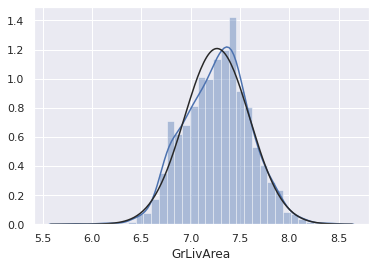

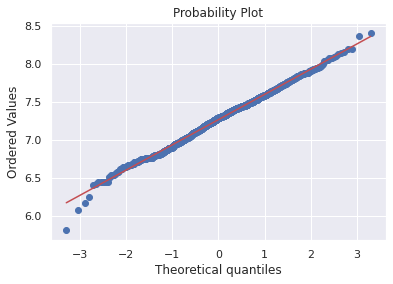

In [24]:
#data transformation
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])
#transformed histogram and normal probability plot
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

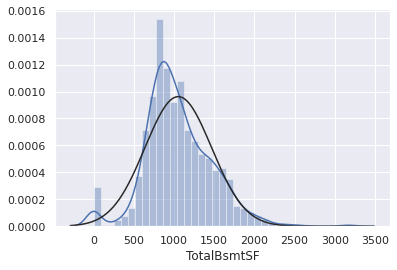

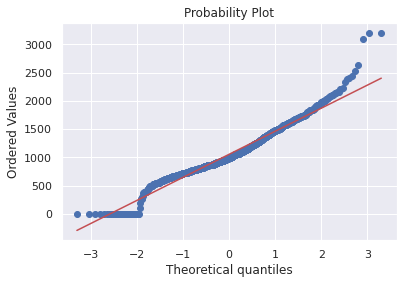

In [25]:
#histogram and normal probability plot
sns.distplot(df_train['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'], plot=plt)

There is skeness, 
alot of houses have 0 values 
value zero prevents us from doing log transformations 

to apply log transfrom, we transform it to a binary variable. 

In [26]:
#create column for new variable (one is enough because it's a binary categorical feature)
#if area>0 it gets 1, for area==0 it gets 0
df_train['HasBsmt'] = pd.Series(len(df_train['TotalBsmtSF']), index=df_train.index)
df_train['HasBsmt'] = 0 
df_train.loc[df_train['TotalBsmtSF']>0,'HasBsmt'] = 1

In [27]:
#transform data
df_train.loc[df_train['HasBsmt']==1,'TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])

Homoscedacity check



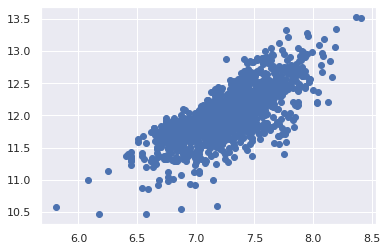

In [28]:
#scatter plot
plt.scatter(df_train['GrLivArea'], df_train['SalePrice']);

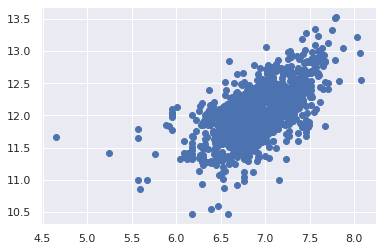

In [29]:
#scatter plot
plt.scatter(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], df_train[df_train['TotalBsmtSF']>0]['SalePrice']);

In [30]:
#We convert categorical var to dummies 

df_train = pd.get_dummies(df_train)